  April H Marbun - 1103202039


In [ ]:
# Mengimport semua library yang diperlukan untuk program
import torch  # Library utama PyTorch
import torch.nn as nn  # Modul Neural Network dari PyTorch
import torch.optim as optim  # Modul optimisasi dari PyTorch
import torchvision  # Library untuk vision tasks di PyTorch
import torchvision.transforms as transforms  # Modul untuk melakukan transformasi pada data gambar
from torch.utils.data import DataLoader  # Kelas DataLoader untuk memuat data secara efisien

In [ ]:
# Setup GPU jika tersedia, jika tidak, gunakan CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Mendefinisikan kelas AlexNet untuk MNIST
class AlexNetMNIST(nn.Module):
    def __init__(self):
        super(AlexNetMNIST, self).__init__()
        # Definisi lapisan-lapisan dari arsitektur AlexNet
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),  # 10 kelas untuk MNIST
        )

    def forward(self, x):
        # Fungsi forward untuk melakukan propagasi maju pada model
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
# Mengeluarkan dataset MNIST dengan transformasi tertentu
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Merubah resolusi gambar menjadi 224x224
    transforms.ToTensor(),  # Mengubah gambar menjadi representasi tensor
])

In [ ]:
# Memuat dan melatih dataset menggunakan DataLoader
# Menyiapkan dataset pelatihan MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Menyiapkan dataset pengujian MNIST
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Menggunakan DataLoader untuk memuat data dalam batch
# DataLoader pelatihan dengan ukuran batch 64 dan pengacakan data
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# DataLoader pengujian dengan ukuran batch 64 dan pengacakan data
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 65468302.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 46182117.36it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30031749.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18918102.05it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Menginisialisasi model AlexNet, kriteria (loss function), dan optimizer
model = AlexNetMNIST().to(device)  # Membuat objek model AlexNet dan memindahkannya ke perangkat yang telah ditentukan (GPU atau CPU)
criterion = nn.CrossEntropyLoss()  # Menggunakan CrossEntropyLoss sebagai kriteria (loss function)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Menggunakan optimizer Adam dengan laju pembelajaran 0.001

In [ ]:
# Loop pelatihan (training) untuk beberapa epoch
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Mengatur model ke mode pelatihan
    total_loss = 0.0  # Inisialisasi total loss pada setiap epoch

    # Loop untuk setiap batch dalam DataLoader pelatihan
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Memindahkan data ke perangkat yang ditentukan

        optimizer.zero_grad()  # Mengatur gradien parameter menjadi nol

        outputs = model(inputs)  # Menghitung output dari model
        loss = criterion(outputs, labels)  # Menghitung nilai loss
        loss.backward()  # Menghitung gradien loss terhadap parameter
        optimizer.step()  # Mengupdate parameter menggunakan optimizer

        total_loss += loss.item()  # Menambahkan loss pada batch ke total loss

    # Menampilkan statistik untuk setiap epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.2592743331234334
Epoch 2/5, Loss: 0.07803372187670995
Epoch 3/5, Loss: 0.06360875689609498
Epoch 4/5, Loss: 0.05417071759467541
Epoch 5/5, Loss: 0.05244577611087703


In [ ]:
# Loop pelatihan (training) untuk beberapa epoch
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Mengatur model ke mode pelatihan
    total_loss = 0.0  # Inisialisasi total loss pada setiap epoch

    # Loop untuk setiap batch dalam DataLoader pelatihan
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Memindahkan data ke perangkat yang ditentukan

        optimizer.zero_grad()  # Mengatur gradien parameter menjadi nol

        outputs = model(inputs)  # Menghitung output dari model
        loss = criterion(outputs, labels)  # Menghitung nilai loss
        loss.backward()  # Menghitung gradien loss terhadap parameter
        optimizer.step()  # Mengupdate parameter menggunakan optimizer

        total_loss += loss.item()  # Menambahkan loss pada batch ke total loss

    # Menampilkan statistik untuk setiap epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

Test Accuracy: 0.9931


Correctly Classified Images:


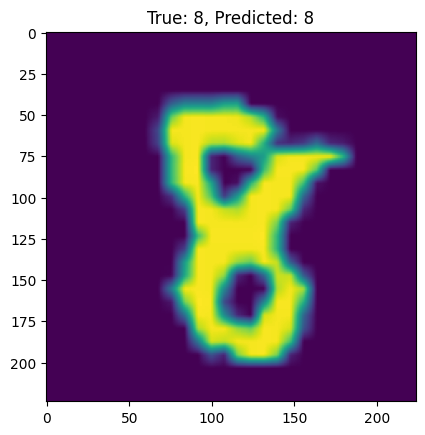

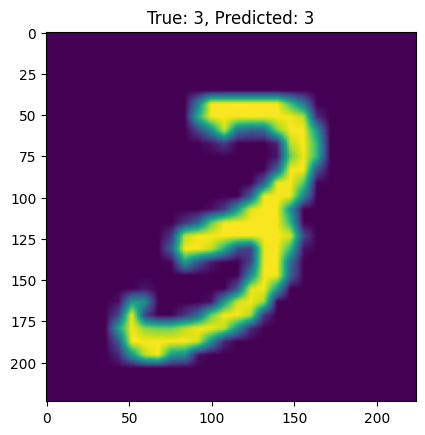

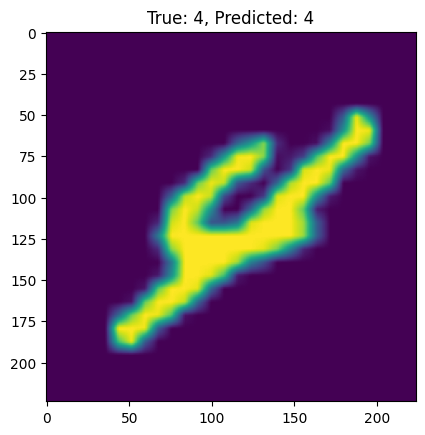

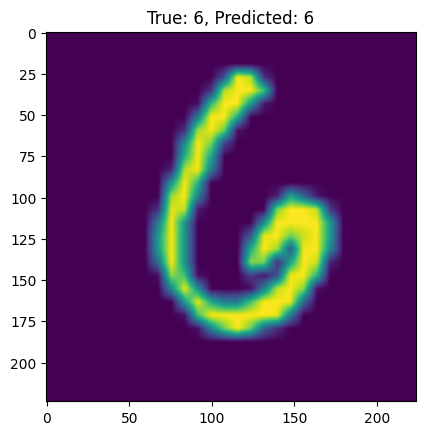

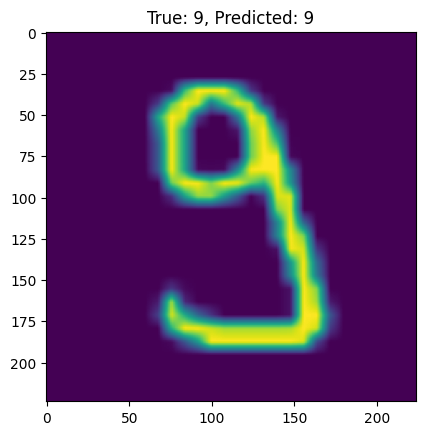

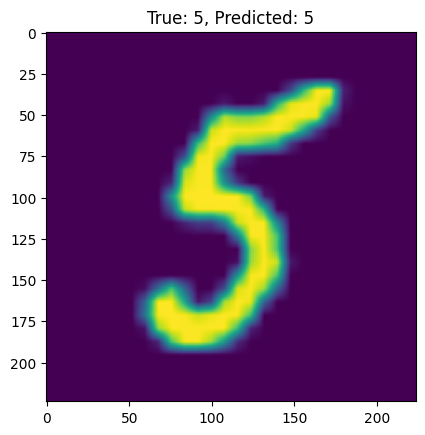

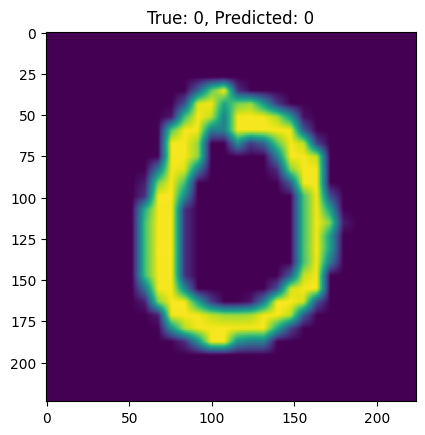

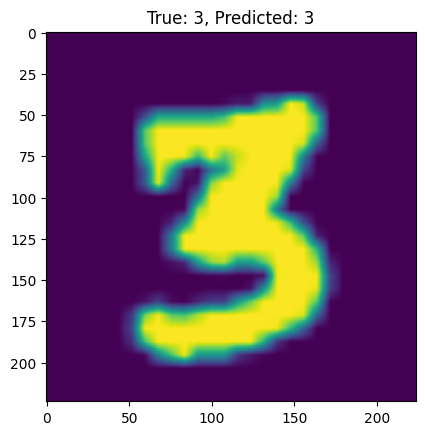

Incorrectly Classified Images:


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menampilkan gambar dengan label
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Mendapatkan satu batch data pengujian
dataiter = iter(test_loader)
images, labels = next(dataiter)  # Menggunakan next() untuk mendapatkan batch berikutnya

# Melakukan prediksi
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Menampilkan gambar dengan prediksi
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

# Menampilkan prediksi yang benar
print("Gambar yang Terklasifikasi dengan Benar:")
for i in range(8):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

# Menampilkan prediksi yang salah
print("Gambar yang Terklasifikasi Salah:")
if incorrect_pred_indices.dim() == 0:  # Memeriksa apakah ini adalah scalar
    incorrect_pred_indices = incorrect_pred_indices.unsqueeze(0)  # Mengonversi menjadi tensor 1D

for i in range(min(3, len(incorrect_pred_indices))):
    index = incorrect_pred_indices[i].item()  # Menggunakan item() untuk mendapatkan nilai scalar
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")